## Autoimmune Tweets using Lemmatized Tweets with 8 categories of autoimmune diseases
to test on Celiac Disease with 2 classes instead of 8
Python 3.6 results, give a solid accuracy based on the data, but when
generating probabilites for a set of random tweets outside the data table, give the exact results for all similar or not statements
Those being: 
1:Multiple Sclerosis, 2:Celiac, 3: Leukemia, 4: Hashimoto, 5: Fibromyalgia, 6: Kidney Disease, 7: Rheumatoid Arthritis, 8: Chron's Disease

Tweets were taken from respective diseases in early December 2019 from 13 to 119 
tweets for each disease, as many as were found that weren't mostly marketing, using ''<disease> treatment' in the search

In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import sklearn 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(507) 
 


In [2]:
reviews = pd.read_csv('TargetReady_noCuss-binaryAdded.csv', encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [3]:
reviews.head()


,Tweet,Type,Celiac_Not,Lkm_Not,Kd_Not,RA_Not,MS_Not,Chron_Not,Fibro_Not,Hashi_Not
0,UNKNOWNResearchCa\r\n@UNKNOWN_ARC\r\n·\r\n19h\...,Rheumatoid Arthritis,not,not,not,RA,not,not,not,not
1,UNKNOWNatology Advisor\r\n@UNKNOWNAdvisor\r\n·...,Rheumatoid Arthritis,not,not,not,RA,not,not,not,not
2,UNKNOWN Community\r\n@our_UNKNOWN\r\n·\r\nDec ...,Rheumatoid Arthritis,not,not,not,RA,not,not,not,not
3,UNKNOWN National Research Foundation\r\n@CureU...,Rheumatoid Arthritis,not,not,not,RA,not,not,not,not
4,Orthopedic News\r\n@Orthopedics_Bio\r\n·\r\nDe...,Rheumatoid Arthritis,not,not,not,RA,not,not,not,not


In [4]:
reviews.tail()

,Tweet,Type,Celiac_Not,Lkm_Not,Kd_Not,RA_Not,MS_Not,Chron_Not,Fibro_Not,Hashi_Not
502,"All Ezine\r\n@allezine\r\n·\r\nJun 13, 2011\r\...",Chron's Disease,not,not,not,not,not,Chron,not,not
503,Brian Coombes\r\n@BrianKCoombes\r\n·\r\nSep 6\...,Chron's Disease,not,not,not,not,not,Chron,not,not
504,"Purpose ?\r\n@HappyBelieber\r\n·\r\nJan 19, 20...",Chron's Disease,not,not,not,not,not,Chron,not,not
505,K. Ketels-Lichtig\r\n@kklichtig\r\n·\r\nOct 25...,Chron's Disease,not,not,not,not,not,Chron,not,not
506,"-DC-\r\n @CURSE WORDwitdaDC\r\n·\r\nJul 8, 2...",Chron's Disease,not,not,not,not,not,Chron,not,not


In [5]:
reviews.shape

(507, 10)

In [6]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                                 Tweet                Type  \
288  Aleksandar dr Petrov\r\n@aleksandar_BG\r\n·\r\...  Multiple Sclerosis   
70   Beyond UNKNOWN\r\n@BeyondUNKNOWN\r\n·\r\nSep 1...      Celiac Disease   
184  #HandsOffVenezuela\r\n@ChicoFreedom\r\n·\r\nDe...            Leukemia   
459  Adult & Pediatric Ear, Nose & Throat\r\n@EarAd...   Hashimoto Disease   
448  Angela J. White\r\n@50Plushealths\r\n·\r\nDec ...        Fibromyalgia   

    Celiac_Not Lkm_Not Kd_Not RA_Not MS_Not Chron_Not Fibro_Not Hashi_Not  
288        not     not    not    not     MS       not       not       not  
70      celiac     not    not    not    not       not       not       not  
184        not     Lkm    not    not    not       not       not       not  
459        not     not    not    not    not       not       not     Hashi  
448        not     not    not    not    not       not     fibro       not  
                                                 Tweet                Type 

In [7]:


reviews.groupby('Type').describe()



Tweet         \
                     count unique   
Type                                
Celiac Disease          50     50   
Chron's Disease         19     19   
Fibromyalgia            99     96   
Hashimoto Disease       30     29   
Kidney Disease          43     43   
Leukemia               119    119   
Multiple Sclerosis     119    119   
Rheumatoid Arthritis    28     28   

                                                                              \
                                                                    top freq   
Type                                                                           
Celiac Disease        Vicki\r\n@vvanblaricum\r\n·\r\nDec 2\r\nReplyi...    1   
Chron's Disease       Lift Resource Centre\r\n@liftcentre\r\n·\r\nJu...    1   
Fibromyalgia          Fibro Bloggers\r\n@FibroBloggers\r\n·\r\nNov 2...    2   
Hashimoto Disease     Colorado Natural Med\r\n@drgravesCO\r\n·\r\nDe...    2   
Kidney Disease        Cleveland Clinic MD\r\n@CleClinicMD\r\n·\r\nDe...    1   
Leukemia              Medivizor\r\n@medivizor\r\n·\r\nNov 28\r\nCopi...    1   
Multiple Sclerosis    Cannabis Industry UK\r\n@CannaIndustryuk\r\n·\...    1   
Rheumatoid Arthritis  Jessica Daitch\r\n@JessinCharlotte\r\n·\r\nSep...    1   

                     Celiac_Not                     Lkm_Not         ...  \
                          count unique     top freq   count unique  ...   
Type                                                                ...   
Celiac Disease               50      1  celiac   50      50      1  ...   
Chron's Disease              19      1     not   19      19      1  ...   
Fibromyalgia                 99      1     not   99      99      1  ...   
Hashimoto Disease            30      1     not   30      30      1  ...   
Kidney Disease               43      1     not   43      43      1  ...   
Leukemia                    119      1     not  119     119      1  ...   
Multiple Sclerosis          119      1     not  119     119      1  ...   
Rheumatoid Arthritis         28      1     not   28      28      1  ...   

                     Chron_Not      Fibro_Not                    Hashi_Not  \
                           top freq     count unique    top freq     count   
Type                                                                         
Celiac Disease             not   50        50      1    not   50        50   
Chron's Disease          Chron   19        19      1    not   19        19   
Fibromyalgia               not   99        99      1  fibro   99        99   
Hashimoto Disease          not   30        30      1    not   30        30   
Kidney Disease             not   43        43      1    not   43        43   
Leukemia                   not  119       119      1    not  119       119   
Multiple Sclerosis         not  119       119      1    not  119       119   
Rheumatoid Arthritis       not   28        28      1    not   28        28   

                                         
                     unique    top freq  
Type                                     
Celiac Disease            1    not   50  
Chron's Disease           1    not   19  
Fibromyalgia              1    not   99  
Hashimoto Disease         1  Hashi   30  
Kidney Disease            1    not   43  
Leukemia                  1    not  119  
Multiple Sclerosis        1    not  119  
Rheumatoid Arthritis      1    not   28  

[8 rows x 36 columns]

In [8]:


reviews['length'] = reviews['Tweet'].map(lambda text: len(text))
print(reviews.head())



                                                 Tweet                Type  \
288  Aleksandar dr Petrov\r\n@aleksandar_BG\r\n·\r\...  Multiple Sclerosis   
70   Beyond UNKNOWN\r\n@BeyondUNKNOWN\r\n·\r\nSep 1...      Celiac Disease   
184  #HandsOffVenezuela\r\n@ChicoFreedom\r\n·\r\nDe...            Leukemia   
459  Adult & Pediatric Ear, Nose & Throat\r\n@EarAd...   Hashimoto Disease   
448  Angela J. White\r\n@50Plushealths\r\n·\r\nDec ...        Fibromyalgia   

    Celiac_Not Lkm_Not Kd_Not RA_Not MS_Not Chron_Not Fibro_Not Hashi_Not  \
288        not     not    not    not     MS       not       not       not   
70      celiac     not    not    not    not       not       not       not   
184        not     Lkm    not    not    not       not       not       not   
459        not     not    not    not    not       not       not     Hashi   
448        not     not    not    not    not       not     fibro       not   

     length  
288     281  
70      247  
184     317  
459     142 

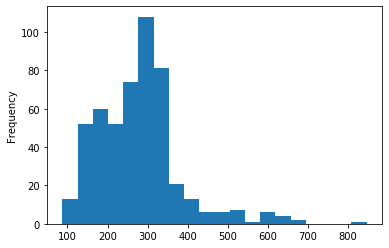

In [9]:
reviews.length.plot(bins=20, kind='hist') 

In [10]:
reviews.length.describe()

count    507.000000
mean     276.568047
std      104.552353
min       87.000000
25%      201.500000
50%      279.000000
75%      320.500000
max      847.000000
Name: length, dtype: float64

In [11]:
print(list(reviews.Tweet[reviews.length > 700].index)) #near the max for length of LemmatizedTweets
print(list(reviews.Type[reviews.length > 700]))
print(list(reviews.Tweet[reviews.length > 700]))

[151]
['Leukemia']
['BTS Mauritius\r\n@BTSMauritius\r\n·\r\n19h\r\nThe Korea Leukemia Children\x92s Foundation announced that 553 ARMYs donated blood in honour of @BTS_twt\r\n\x92s Jin birthday!\r\n\r\nIt\x92ll be used for children with cancer who need to receive large blood transfusions during treatment, helping to ease the burden of costs for patients\x92 families.\r\nQuote Tweet\r\n??????\r\n??\r\n??\r\n@_nojam_nolife\r\n · Dec 3\r\n????? ? ??, ?? ?? ??? ??(??)  \r\n??\r\nhttp://entertain.v.daum.net/v/20191204091525391\r\n\r\n#????? #BTS @BTS_twt \r\n\r\n??????????? ?????? ????? ? ????? ?? ?? ??? 12? 4? ????? ?? ???? ?? ??? ???? ??? 553?? ????? ???.\r\nImage\r\nImage\r\nImage\r\nImage\r\nImprisoned Babies\r\n@aptlmetin\r\n·\r\nDec 3\r\nAkif Acute Lymphoblastic Leukemia patient. He is going through a heavy treatment process. He needs medicare. Let mom?enay DA?TAN have her trial without arrest!\r\n#InternationalDisabilityDay ']


Wall time: 516 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002365A426518>,
      dtype=object)

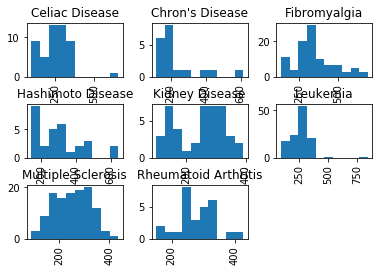

In [12]:
%%time
reviews.hist(column='length', by='Type', bins=10)

In [13]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [14]:


reviews.Tweet.head().apply(split_into_tokens)



288    [Aleksandar, dr, Petrov, aleksandar_BG, ·, Dec...
70     [Beyond, UNKNOWN, BeyondUNKNOWN, ·, Sep, 17, 2...
184    [HandsOffVenezuela, ChicoFreedom, ·, Dec, 2, o...
459    [Adult, Pediatric, Ear, Nose, Throat, EarAdult...
448    [Angela, J, White, 50Plushealths, ·, Dec, 15, ...
Name: Tweet, dtype: object

In [15]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [16]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [18]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.Tweet.head().apply(split_into_lemmas)

288    [aleksandar, dr, petrov, aleksandar_bg, ·, dec...
70     [beyond, unknown, beyondunknown, ·, sep, 17, 2...
184    [handsoffvenezuela, chicofreedom, ·, dec, 2, o...
459    [adult, pediatric, ear, nose, throat, earadult...
448    [angela, white, 50plushealths, ·, dec, 15, 201...
Name: Tweet, dtype: object

In [19]:
# Celiac or Not classes

#%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas, ngram_range=(1,4)).fit(reviews['Tweet'])
print(len(bow_transformer.vocabulary_))



4792


In [20]:
bow_transformer

CountVectorizer(analyzer=<function split_into_lemmas at 0x000002365C19DAE8>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [21]:
review4 = reviews['Tweet'][148]
print(review4)

Peking University
@PKU1898
·
Nov 30
Published in Cold Spring Harbor Perspectives in Medicine, #Peking Universitys Wu Hong and team analyzed connections between a tumor suppressing gene called PTEN, the formation of blood cell components, and leukemia. #PekingScience


In [22]:


bow4 = bow_transformer.transform([review4])
print(bow4)



  (0, 113)	1
  (0, 371)	1
  (0, 705)	1
  (0, 816)	1
  (0, 898)	1
  (0, 1023)	1
  (0, 1062)	1
  (0, 1085)	1
  (0, 1780)	1
  (0, 1846)	1
  (0, 1990)	1
  (0, 2095)	1
  (0, 2545)	1
  (0, 2788)	1
  (0, 3111)	1
  (0, 3303)	2
  (0, 3304)	1
  (0, 3330)	1
  (0, 3369)	1
  (0, 3533)	1
  (0, 3535)	1
  (0, 4022)	1
  (0, 4140)	1
  (0, 4205)	1
  (0, 4401)	1
  (0, 4472)	1
  (0, 4474)	1
  (0, 4729)	1
  (0, 4790)	1


In [23]:
%%time
reviews_bow = bow_transformer.transform(reviews['Tweet'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (507, 4792)
number of non-zeros: 12995
sparsity: 0.53%
Wall time: 1 s


In [24]:


# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:400]
reviews_bow_test = reviews_bow[400:]
reviews_sentiment_train = reviews['Celiac_Not'][:400]
reviews_sentiment_test = reviews['Celiac_Not'][400:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(400, 4792)
(107, 4792)


In [25]:


%time review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 15.6 ms


In [26]:


print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.Celiac_Not[151])



predicted: not
expected: not


In [27]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not'
 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'celiac' 'not' 'not'
 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'celiac' 'not'
 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'celiac' 'not' 'not' 'not'
 'not' 'not' 'celiac' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not'
 'not' 'not' 'not' 'not' 'celiac' 'not' 'not' 'not' 'not' 'not' 'not'
 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'celiac' 'not' 'not' 'not'
 'celiac' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not'
 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'not' 'celiac'
 'not' 'not' 'not' 'not' 'not' 'not' 'not']


In [28]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.8878504672897196
confusion matrix
 [[ 1  5]
 [ 7 94]]
(row=expected, col=predicted)


In [29]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

              precision    recall  f1-score   support

      celiac       0.12      0.17      0.14         6
         not       0.95      0.93      0.94       101

    accuracy                           0.89       107
   macro avg       0.54      0.55      0.54       107
weighted avg       0.90      0.89      0.90       107



In [30]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, '\nThe respective order new or pro probabilities:\n',np.around(review_sentiment.predict_proba(new_sample), decimals=2),'\n')

## The probabilities of being Celiac Disease or not are in alphabetical order for [Celiac Disease, Not]

In [32]:
predict_review('driving to the hospital.')

predict_review('stomach aches.')

predict_review('gluten.')
predict_review('bring home some coffee.')
#a snippet of an actual tweet from RA
predict_review('carbs galore')

driving to the hospital. 
The respective order new or pro probabilities:
 [[0.07 0.93]] 

stomach aches. 
The respective order new or pro probabilities:
 [[0.11 0.89]] 

gluten. 
The respective order new or pro probabilities:
 [[0.58 0.42]] 

bring home some coffee. 
The respective order new or pro probabilities:
 [[0.16 0.84]] 

carbs galore 
The respective order new or pro probabilities:
 [[0.38 0.62]] 

